<a href="https://colab.research.google.com/github/nnguyenu/ML-basic/blob/main/Convex_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from cvxopt import matrix, solvers
c = matrix([-5., -3.])
G = matrix([[1., 2., 1., -1., 0.], [1., 1., 4., 0., -1.]])
h = matrix([10., 16., 32., 0., 0.])

solvers.options['show_progress'] = False
sol = solvers.lp(c, G, h)

print('Solution"')
print(sol['x'])

Solution"
[ 6.00e+00]
[ 4.00e+00]



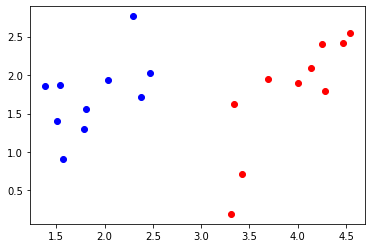

In [3]:
from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1 
X = np.concatenate((X0.T, X1.T), axis = 1) # all data 
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels 

plt.plot(X0[:,0],X0[:,1],'bo')
plt.plot(X1[:,0],X1[:,1],'ro')

In [4]:
from cvxopt import matrix, solvers
# build K
V = np.concatenate((X0.T, -X1.T), axis = 1)
K = matrix(V.T.dot(V)) # see definition of V, K near eq (8)

p = matrix(-np.ones((2*N, 1))) # all-one vector 
# build A, b, G, h 
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
print('lambda = ')
print(l.T)

lambda = 
[[8.54018321e-01 2.89132533e-10 1.37095535e+00 6.36030818e-10
  4.04317408e-10 8.82390106e-10 6.35001881e-10 5.49567576e-10
  8.33359230e-10 1.20982928e-10 6.86678649e-10 1.25039745e-10
  2.22497367e+00 4.05417905e-09 1.26763684e-10 1.99008949e-10
  2.13742578e-10 1.51537487e-10 3.75329509e-10 3.56161975e-10]]


w =  [[-2.00984381  0.64068336]]
b =  4.668560633868097


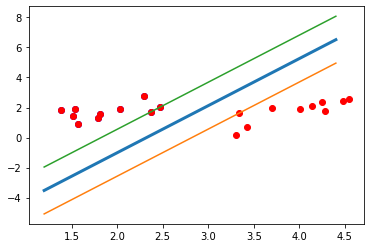

In [10]:
epsilon = 1e-6 # just a small number, greater than 1e-9
S = np.where(l > epsilon)[0]

VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
b = np.mean(yS.T - w.T.dot(XS))

print('w = ', w.T)
print('b = ', b)

plt.plot(X0[:,0],X0[:,1],'bo')
plt.plot(X1[:,0],X1[:,1],'ro')

x_line = np.arange(1.2,4.5,0.1)
y_line = (-b - w[0,0]*x_line) / w[1,0]
y_line1 = (-(b+1) - w[0,0]*x_line) / w[1,0]
y_line2 = (-(b-1) - w[0,0]*x_line) / w[1,0]
plt.plot(x_line,y_line,linewidth=3)
plt.plot(x_line,y_line1)
plt.plot(x_line,y_line2)

w =  [[-2.00971102  0.64194082]]
b =  [4.66595309]


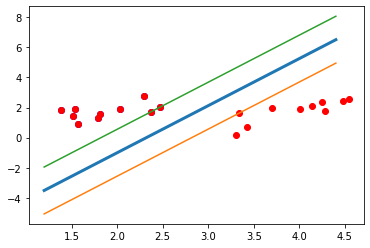

In [11]:
# implementation of Hard-Margin SVM
from sklearn.svm import SVC

y1 = y.reshape((2*N,))
X1 = X.T # each sample is one row
clf = SVC(kernel = 'linear', C = 1e5) # C is just a big number to force Soft-Margin SVM to Hard-Margin SVM

clf.fit(X1, y1) 

w = clf.coef_
b = clf.intercept_
print('w = ', w)
print('b = ', b)

plt.plot(X0[:,0],X0[:,1],'bo')
plt.plot(X1[:,0],X1[:,1],'ro')

x_line = np.arange(1.2,4.5,0.1)
y_line = (-b - w[0,0]*x_line) / w[0,1]
y_line1 = (-(b+1) - w[0,0]*x_line) / w[0,1]
y_line2 = (-(b-1) - w[0,0]*x_line) / w[0,1]
plt.plot(x_line,y_line,linewidth=3)
plt.plot(x_line,y_line1)
plt.plot(x_line,y_line2)